### Checking out h-index distribution

Minimum h-index: 1
Maximum h-index: 187


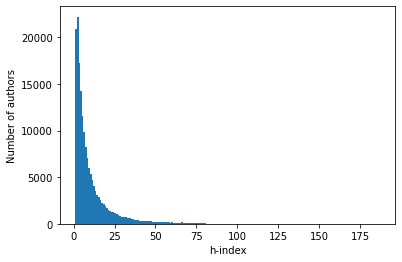

In [126]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy import stats
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, normalize

os.chdir('/home/laura/Documents/Polytechnique/MScT - M1/INF554 Machine Learning/Kaggle Data Challenge/INF554-Final-Project')

training = pd.read_csv("data/train.csv")

min_h = int(min(training.hindex))
max_h = int(max(training.hindex))
print(f'Minimum h-index: {min_h}')
print(f'Maximum h-index: {max_h}')

fig, ax = plt.subplots()
ax.hist(training.hindex, bins = max_h)
ax.set_ylabel('Number of authors')
ax.set_xlabel('h-index')

plt.show()



In [127]:
training.groupby('hindex').count()

,author
hindex,
1.0,20884
2.0,22230
3.0,17271
4.0,14247
5.0,11621
...,...
163.0,1
164.0,1
169.0,1


In [128]:
training.groupby('hindex').count()[100:]

,author
hindex,
100.0,9
101.0,7
102.0,12
103.0,9
104.0,5
105.0,9
106.0,1
107.0,6
108.0,7


### Some transformations to see if I can transform data to be more uniform-like

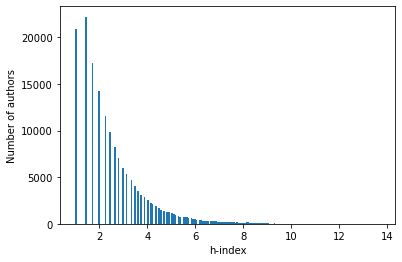

In [129]:
# Square root
sqrt_training = training.copy()
sqrt_training.hindex = np.sqrt(training.hindex)

fig, ax = plt.subplots()
ax.hist(sqrt_training.hindex, bins = max_h)
ax.set_ylabel('Number of authors')
ax.set_xlabel('h-index')

plt.show()

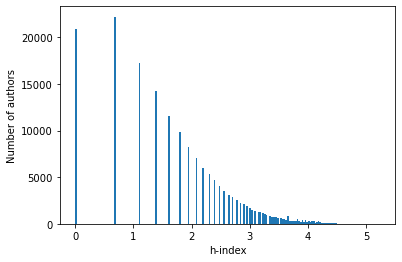

In [130]:
# log
log_training = training.copy()
log_training.hindex = np.log(training.hindex)

fig, ax = plt.subplots()
ax.hist(log_training.hindex, bins = max_h)
ax.set_ylabel('Number of authors')
ax.set_xlabel('h-index')

plt.show()

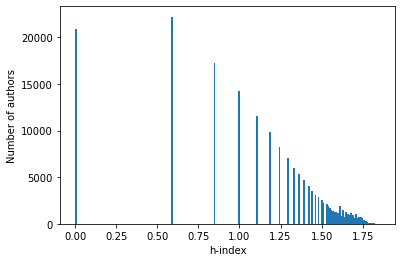

In [131]:
# lambda = -1. is a reciprocal transform.
# lambda = -0.5 is a reciprocal square root transform.
# lambda = 0.0 is a log transform.
# lambda = 0.5 is a square root transform.
# lambda = 1.0 is no transform.
# boxcox

boxcox_training = training.copy()
boxcox_training.hindex = stats.boxcox(training.hindex, lmbda=-0.5)

fig, ax = plt.subplots()
ax.hist(boxcox_training.hindex, bins = max_h)
ax.set_ylabel('Number of authors')
ax.set_xlabel('h-index')

plt.show()

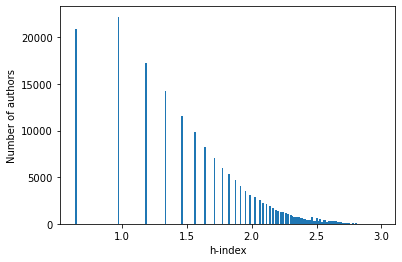

In [132]:
# yeojohnson
yeojohnson_training = training.copy()
yeojohnson_training.hindex, _ = stats.yeojohnson(training.hindex)

fig, ax = plt.subplots()
ax.hist(yeojohnson_training.hindex, bins = max_h)
ax.set_ylabel('Number of authors')
ax.set_xlabel('h-index')

plt.show()

### RobustScaler or PowerTransformer

Minimum h-index: -1
Maximum h-index: 2


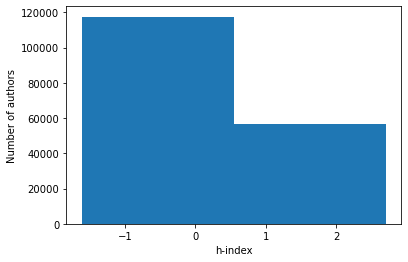

In [133]:
training_scaled = training.copy()
hdata  = np.array(training_scaled['hindex'])
hdata = hdata.reshape(-1, 1)

scaler = PowerTransformer().fit(hdata)
hdata_scaled = scaler.transform(hdata)
training_scaled['hindex'] = hdata_scaled

min_h = int(min(training_scaled.hindex))
max_h = int(max(training_scaled.hindex))
print(f'Minimum h-index: {min_h}')
print(f'Maximum h-index: {max_h}')

fig, ax = plt.subplots()
ax.hist(training_scaled.hindex, bins = max_h)
ax.set_ylabel('Number of authors')
ax.set_xlabel('h-index')

plt.show()

Minimum h-index: 1
Maximum h-index: 187


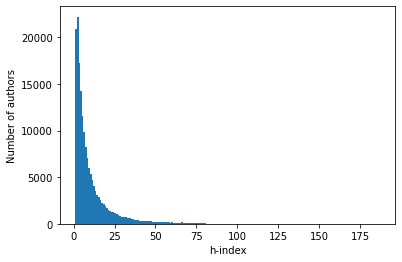

In [134]:
hdata_unscaled = scaler.inverse_transform(hdata_scaled)
training_scaled['hindex'] = hdata_unscaled

min_h = int(min(training_scaled.hindex))
max_h = int(max(training_scaled.hindex))
print(f'Minimum h-index: {min_h}')
print(f'Maximum h-index: {max_h}')

fig, ax = plt.subplots()
ax.hist(training_scaled.hindex, bins = max_h)
ax.set_ylabel('Number of authors')
ax.set_xlabel('h-index')

plt.show()

### Normalize

Minimum h-index: 1
Maximum h-index: 1


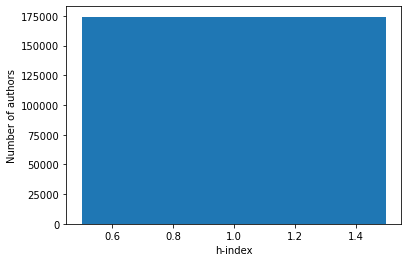

In [135]:
training_norm = training.copy()
hdata  = np.array(training_norm['hindex'])
hdata = hdata.reshape(-1, 1)

hdata_norm = normalize(hdata, norm='l1')
training_norm['hindex'] = hdata_norm

min_h = int(min(training_norm.hindex))
max_h = int(max(training_norm.hindex))
print(f'Minimum h-index: {min_h}')
print(f'Maximum h-index: {max_h}')

fig, ax = plt.subplots()
ax.hist(training_norm.hindex, bins = max_h)
ax.set_ylabel('Number of authors')
ax.set_xlabel('h-index')

plt.show()

### PCA with the data

#### Kmeans on the node2vec embedding

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

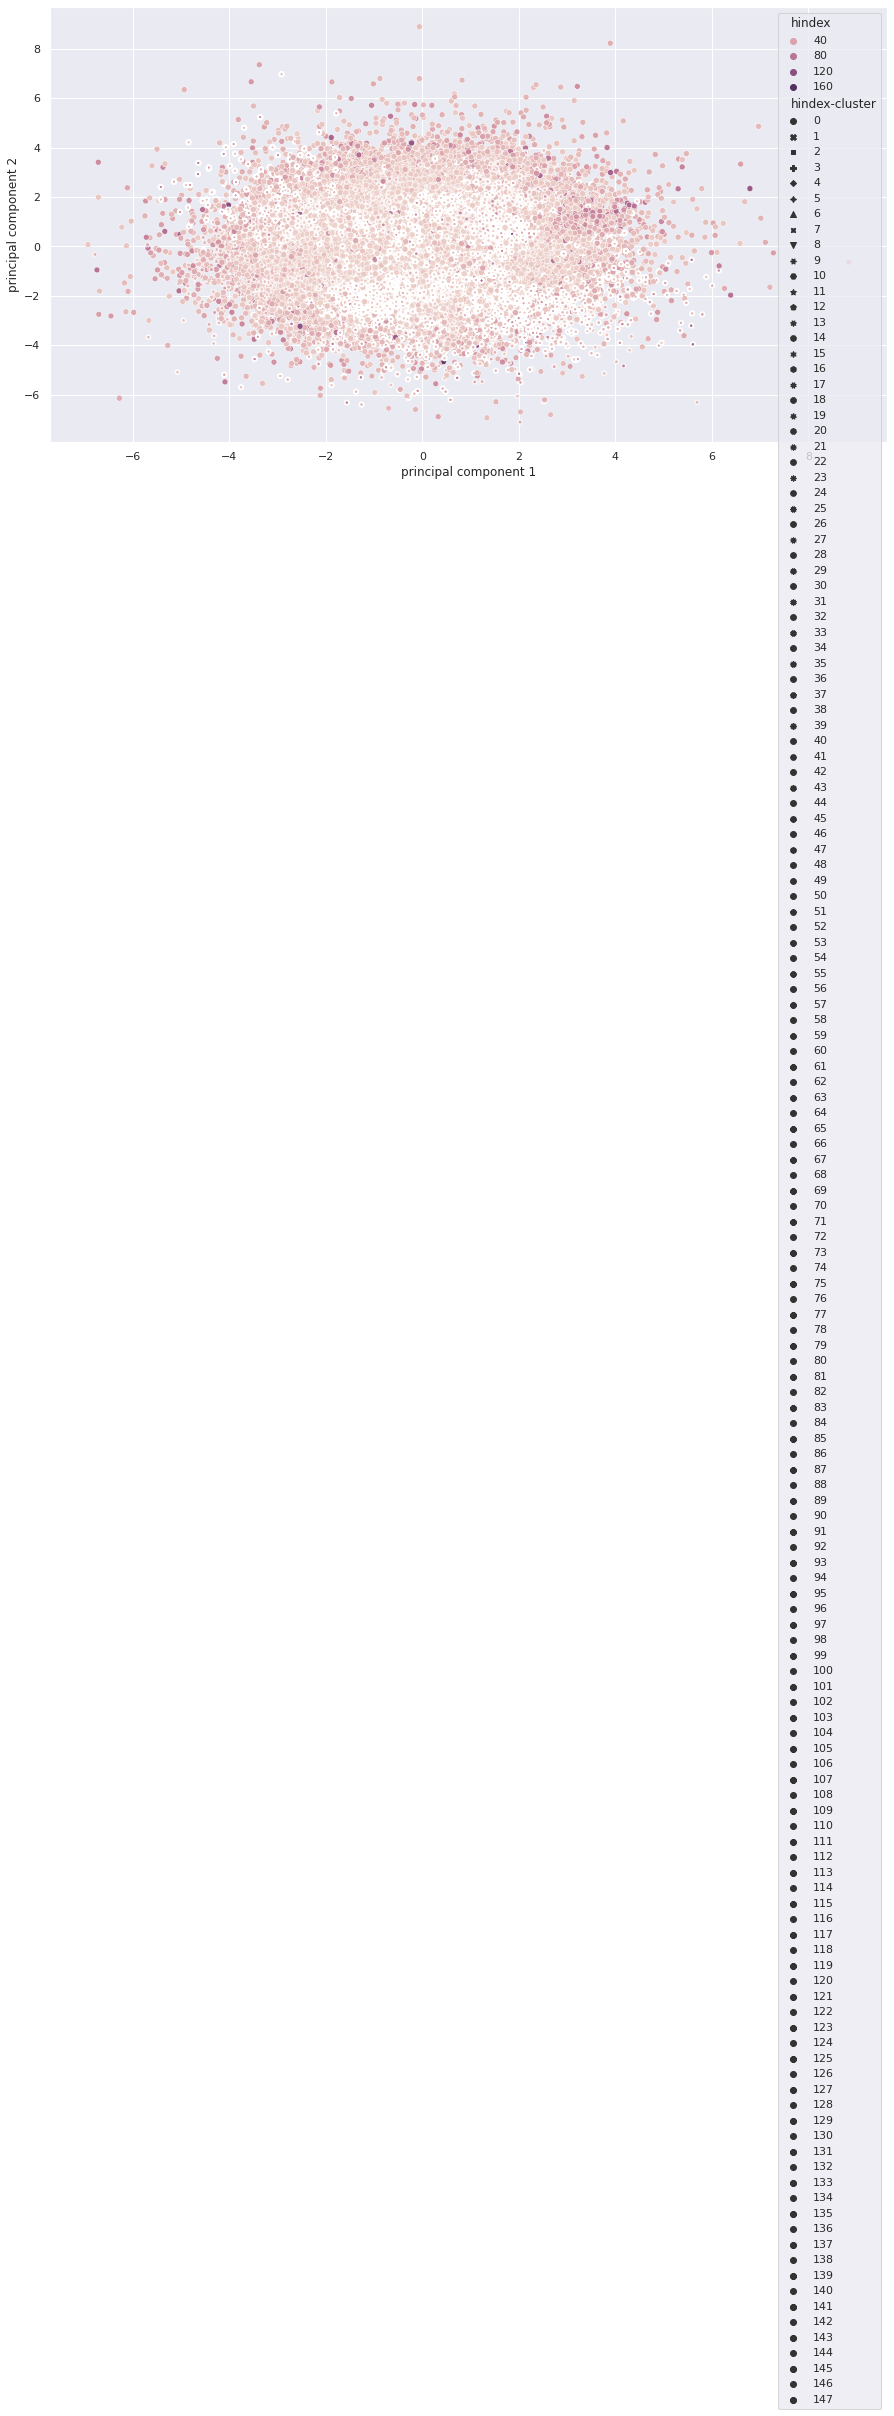

In [136]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd

train = pd.read_csv("data/train.csv")
train.index = train.author
train.drop('author', axis=1, inplace=True)

data = pd.read_csv('data/intermediary/node2vec.csv', sep=' ', header=None)
data = pd.DataFrame(data)#, columns = ['author', 'n1', 'n2', 'n3', 'n4', 'n5'])
data = data.rename(columns={0:'author', 1: 'n1', 2: 'n2', 3: 'n3', 4:'n4',5: 'n5'})
data = data[data['author'].isin(train.index)]
data.index = data.author
data.drop('author', axis=1, inplace=True)
data = pd.concat([data, train], axis=1)

#separating the node list and the embeding
nodes_list = data.index
embeding = data.iloc[:,:5]

#PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(embeding)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

#cluster on the PCA
kmeans = KMeans(n_clusters=148, random_state=0).fit(embeding)
labels = kmeans.labels_

principalDf['hindex-cluster'] = list(labels)
principalDf['hindex'] = list(data.hindex)
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(x=principalDf['principal component 1'], y=principalDf['principal component 2'], hue=principalDf['hindex'], style=principalDf['hindex-cluster'])

Checking out the PCA of specific h-indices

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

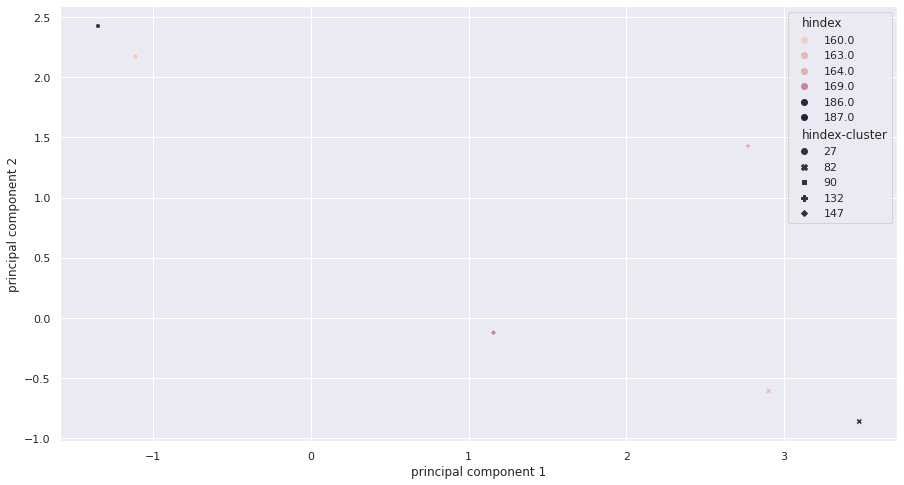

In [137]:
principalDf_tmp = principalDf[principalDf.hindex >= 160]

sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(x=principalDf_tmp['principal component 1'], y=principalDf_tmp['principal component 2'], hue=principalDf_tmp['hindex'], style=principalDf_tmp['hindex-cluster'])

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

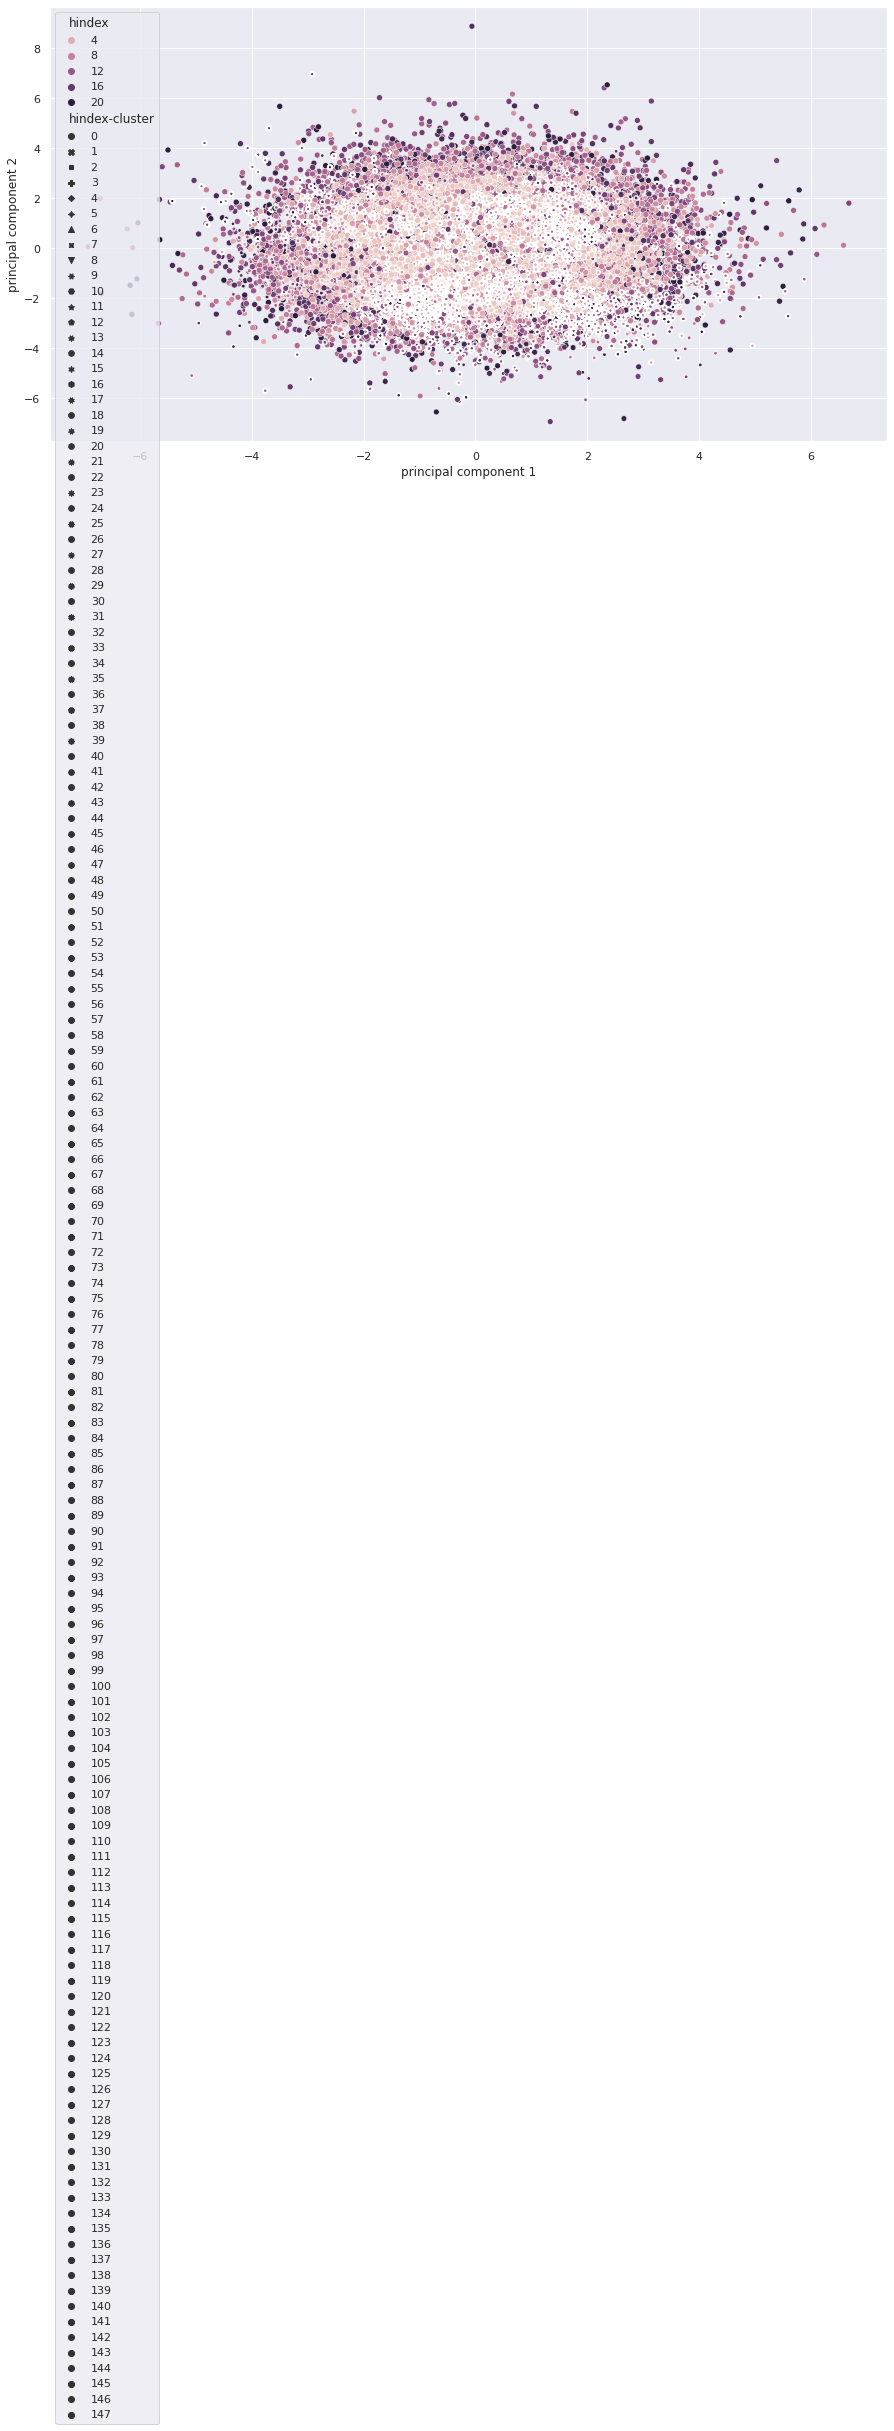

In [138]:
principalDf_tmp = principalDf[principalDf.hindex <= 20]
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(x=principalDf_tmp['principal component 1'], y=principalDf_tmp['principal component 2'], hue=principalDf_tmp['hindex'], style=principalDf_tmp['hindex-cluster'])

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

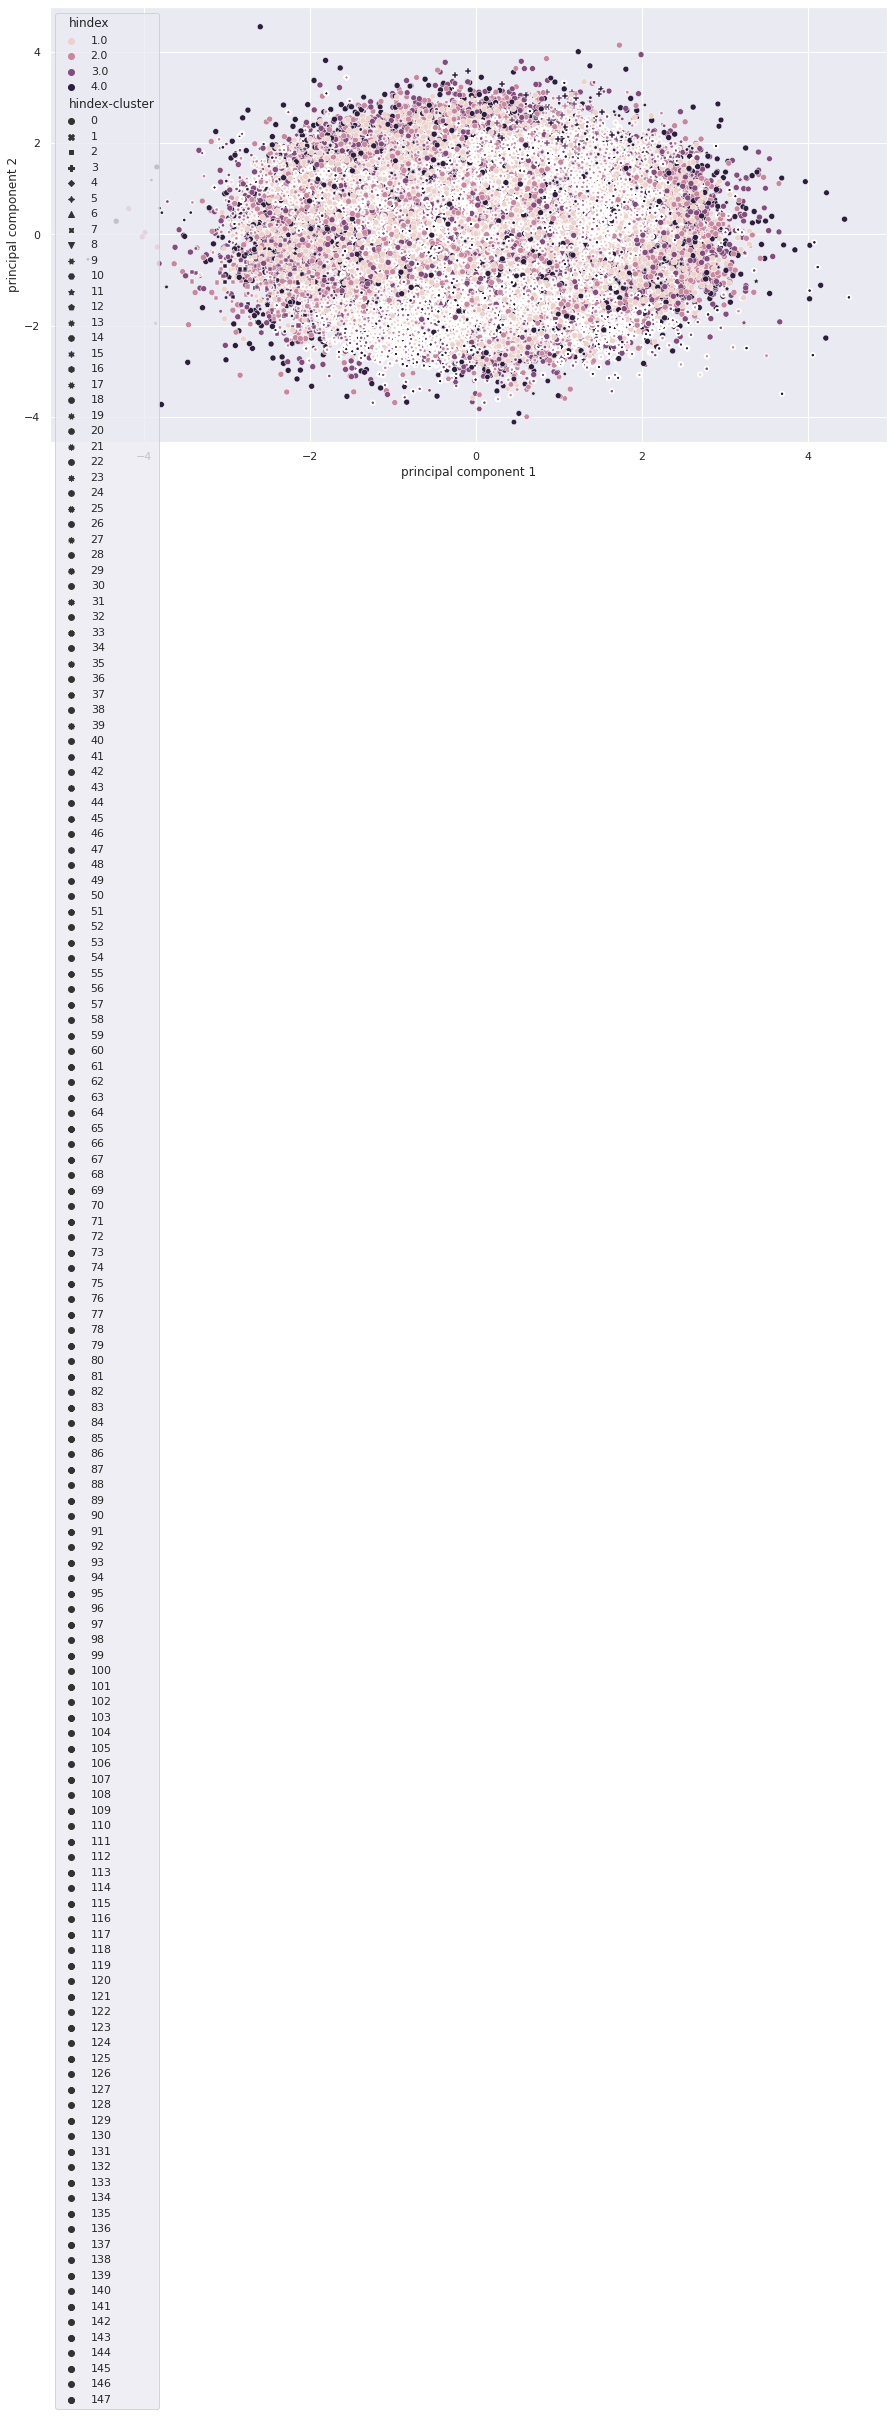

In [139]:
principalDf_tmp = principalDf[principalDf.hindex <= 4]
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(x=principalDf_tmp['principal component 1'], y=principalDf_tmp['principal component 2'], hue=principalDf_tmp['hindex'], style=principalDf_tmp['hindex-cluster'])

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

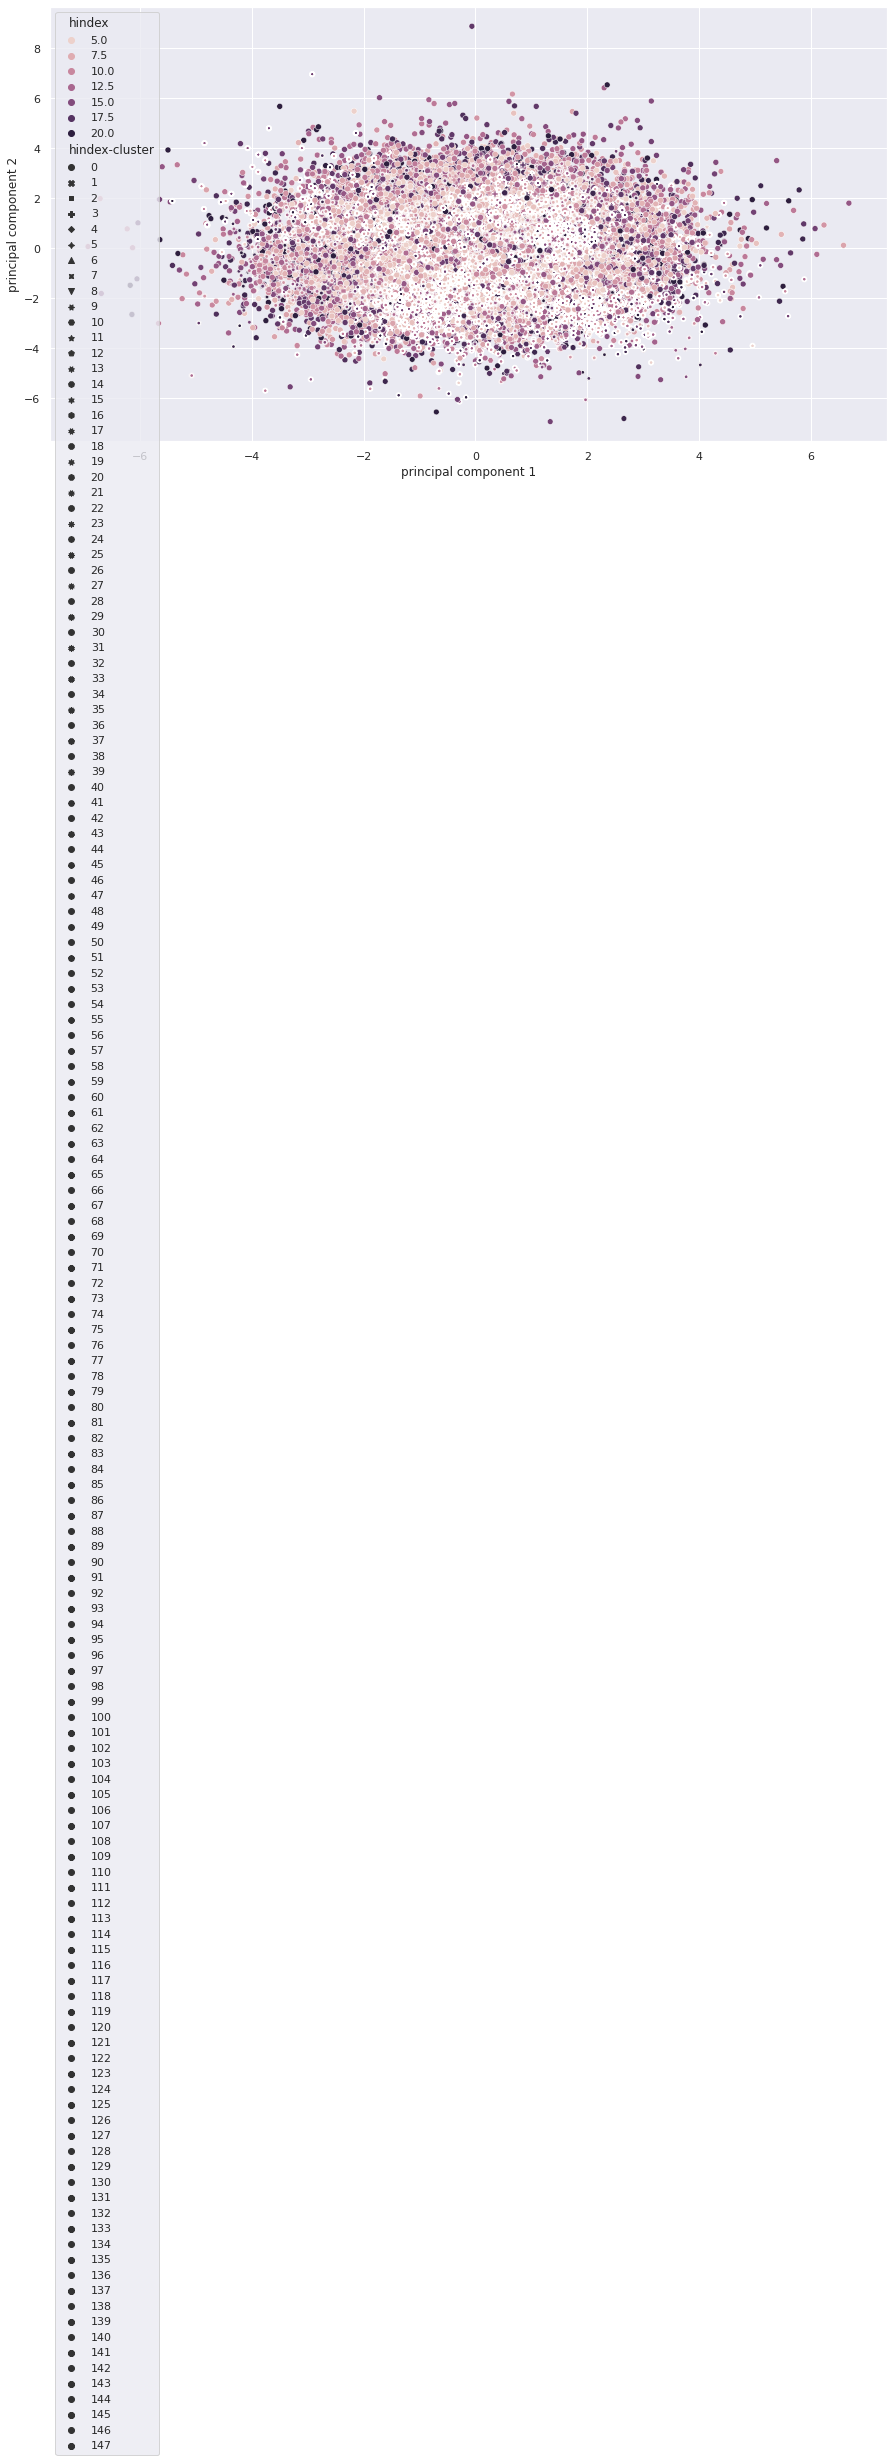

In [140]:
principalDf_tmp = principalDf[(principalDf.hindex > 4 ) & (principalDf.hindex <= 20)]
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(x=principalDf_tmp['principal component 1'], y=principalDf_tmp['principal component 2'], hue=principalDf_tmp['hindex'], style=principalDf_tmp['hindex-cluster'])